In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt2
import matplotlib.gridspec as gridspec
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go
from sklearn import metrics

In [2]:
df = pd.read_excel('tryasamendeks.xls',encoding="iso-8859-1", skiprows=5)
df.drop([0], axis=0, inplace=True)
df.dropna(axis=1, how='all',inplace=True)
df.dropna(axis=0, how="any",inplace=True)
df.rename(columns={'İl\nProvince':'İl',
                   'Sıralama\nRank':'Genel Sıralama',
                   'Endeks\nIndex':'Genel İndex',
                   'Sıralama\nRank.1':'Konut Sıralaması',
                   'Endeks\nIndex.1':'Konut İndexi',
                   'Sıralama\nRank.2':'Çalışma Hayatı Sıralaması',
                   'Endeks\nIndex.2':'Çalışma Hayatı İndexi',
                   'Sıralama\nRank.3':'Gelir ve Servet Sıralaması',
                   'Endeks\nIndex.3':'Gelir ve Servet İndexi',
                   'Sıralama\nRank.4':'Sağlık Sıralaması',
                   'Endeks\nIndex.4':'Sağlık İndexi',
                   'Sıralama\nRank.5':'Eğitim Sıralaması',
                   'Endeks\nIndex.5':'Eğitim İndexi',
                   'Sıralama\nRank.6':'Çevre Sıralaması',
                   'Endeks\nIndex.6':'Çevre İndexi',
                   'Sıralama\nRank.7':'Güvenlik Sıralaması',
                   'Endeks\nIndex.7':'Güvenlik İndexi',
                   'Sıralama\nRank.8':'Sivil Katılım Sıralaması',
                   'Endeks\nIndex.8':'Sivil Katılım İndexi',
                   'Sıralama\nRank.9':'Altyapı Hizmetlerine Erişim Sıralaması',
                   'Endeks\nIndex.9':'Altyapı Hizmetlerine Erişim İndexi',
                   'Sıralama\nRank.10':'Sosyal Yaşam Sıralaması',
                   'Endeks\nIndex.10':'Sosyal Yaşam İndexi',
                   'Sıralama\nRank.11':'Yaşam Memnuniyeti Sıralaması',
                   'Endeks\nIndex.11':'Yaşam Memnuniyeti İndexi',},inplace=True)
df.head()

,İl,Genel Sıralama,Genel İndex,Konut Sıralaması,Konut İndexi,Çalışma Hayatı Sıralaması,Çalışma Hayatı İndexi,Gelir ve Servet Sıralaması,Gelir ve Servet İndexi,Sağlık Sıralaması,...,Güvenlik Sıralaması,Güvenlik İndexi,Sivil Katılım Sıralaması,Sivil Katılım İndexi,Altyapı Hizmetlerine Erişim Sıralaması,Altyapı Hizmetlerine Erişim İndexi,Sosyal Yaşam Sıralaması,Sosyal Yaşam İndexi,Yaşam Memnuniyeti Sıralaması,Yaşam Memnuniyeti İndexi
1,Isparta,1.0,0.674495,4.0,0.905926,13.0,0.658211,19.0,0.526706,1.0,...,13.0,0.733561,46.0,0.417565,24.0,0.520430,7.0,0.610922,13.0,0.795123
2,Sakarya,2.0,0.673716,1.0,0.936862,28.0,0.618137,33.0,0.462056,14.0,...,26.0,0.681916,1.0,0.796696,20.0,0.541254,6.0,0.614200,15.0,0.775224
3,Bolu,3.0,0.655350,3.0,0.924731,26.0,0.624039,9.0,0.580261,2.0,...,28.0,0.678006,59.0,0.381365,35.0,0.454604,3.0,0.644067,14.0,0.789518
4,Kütahya,4.0,0.652004,15.0,0.847419,3.0,0.702308,16.0,0.546107,24.0,...,6.0,0.743963,39.0,0.430468,42.0,0.424385,5.0,0.621469,5.0,0.890695
5,İstanbul,5.0,0.649418,28.0,0.801123,33.0,0.601742,1.0,0.878825,29.0,...,73.0,0.473010,12.0,0.509576,1.0,0.959162,1.0,0.674706,50.0,0.460202


In [3]:
df1 = pd.read_excel('tryasam.xls',encoding="iso-8859-1", skiprows=5)
df1.drop([0], axis=0, inplace=True)
df1.dropna(axis=1, how='all',inplace=True)
df1.dropna(axis=0, how="any",inplace=True)
df1.rename(columns={'İl\nProvince':'İl',
                    'İşsizlik oranı \n(%) Unemployment rate \n(%)':'İşsizlik oranı',
                    'Ortalama günlük kazanç \n(TL) Average daily earnings \n(TRY)':'Ortalama günlük kazanç',
                   'Orta ve üstü gelir grubundaki hanelerin oranı\n(%)   \nPercentage of households in middle or higher income groups\n(%)':'Orta ve üstü gelir grubundaki hanelerin oranı',
                   'Temel ihtiyaçlarını karşılayamadığını beyan eden hanelerin oranı\n(%)   \nPercentage of households declaring to fail on meeting basic needs\n(%)  ':'Temel ihtiyaçlarını karşılayamadığını beyan eden hanelerin oranı',
                   'Sağlığından memnuniyet oranı \n(%) \nSatisfication rate with health status \n(%)':'Sağlığından memnuniyet oranı',
                   'Kamunun sağlık hizmetlerinden memnuniyet oranı \n(%) \nSatisfication rate with public health services \n(%)':'Kamunun sağlık hizmetlerinden memnuniyet oranı',
                   'Kamunun eğitim hizmetlerinden memnuniyet oranı \n(%) \nSatisfaction rate with public education services \n(%)':'Kamunun eğitim hizmetlerinden memnuniyet oranı',
                   'Sokaktan gelen gürültü problemi yaşayanların oranı \n(%) \nPercentage of households having noise problems from the streets \n(%)':'Sokaktan gelen gürültü problemi yaşayanların oranı',
                   'Kamunun asayiş hizmetlerinden memnuniyet oranı \n(%) \nSatisfication rate with public safety services \n(%)':'Kamunun asayiş hizmetlerinden memnuniyet oranı',
                   'Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı\n(%)  \nSatisfaction rate with municipal public transport services\n(%) ':'Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı',
                   'Sosyal hayatından memnuniyet oranı \n(%) \nSatisfication rate with social life \n(%)':'Sosyal hayatından memnuniyet oranı',
                   'Mutluluk düzeyi \n(%) \nLevel of happiness \n(%)':'Mutluluk düzeyi'},inplace=True)
df1.head()

,İl,Fert başına düşen oda sayısı Number of rooms per person,Konutun içinde tuvalet mevcudiyeti oranı (%) Toilet presence percentage in dwellings (%),Konutun kalitesinde problem yaşayanların oranı (%) Percentage of households having problems with quality of dwellings (%),İstihdam oranı (%) Employment rate (%),İşsizlik oranı,Ortalama günlük kazanç,İşinden memnuniyet oranı (%) Job satisfaction rate (%),Kişi başına düşen tasarruf mevduatı (TL) Savings deposit per capita (TRY),Orta ve üstü gelir grubundaki hanelerin oranı (%) Percentage of households in middle or higher income groups (%),...,İnternet abone sayısı (yüz kişide) Number of internet subscriptions (per hundred persons),Kanalizasyon ve şebeke suyuna erişim oranı (%) Access rate of population to sewerage and pipe system (%),Havalimanına erişim oranı Access rate to airport,Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı,Sinema ve tiyatro seyirci sayısı (yüz kişide) Number of cinema and theatre audience (per hundred persons),Bin kişi başına düşen alışveriş merkezi alanı (m2) Shopping mall area per thousand people (m2),Sosyal ilişkilerinden memnuniyet oranı (%) Satisfication rate with social relations (%),Sosyal hayatından memnuniyet oranı,Mutluluk düzeyi,Bölge
1,Adana,1.22,86.34,22.7300,43.3,13.2,59.064891,73.32,5427.724944,34.06,...,9.737647,91.500003,7449.761905,56.34,73.090444,82.44524,81.90,46.74,53.00,Akdeniz Bölgesi
2,Adıyaman,0.93,77.07,41.1200,39.2,9.1,53.242814,64.26,1542.666455,16.27,...,3.714905,67.715925,74.326923,36.72,2.903811,0.00000,81.82,56.88,65.01,Güneydoğu Anadolu Bölgesi
3,Afyonkarahisar,1.36,90.20,12.9475,51.1,5.6,53.911573,85.34,4062.055209,29.73,...,7.035255,71.867758,11.969440,74.24,34.917628,119.90866,94.04,70.29,76.43,Ege Bölgesi
4,Ağrı,0.84,64.06,40.4750,53.2,6.8,56.108035,63.97,842.046830,22.56,...,2.163495,50.363737,167.023810,48.54,6.321949,0.00000,90.04,46.16,60.09,Doğu Anadolu Bölgesi
5,Amasya,1.40,95.03,16.8550,47.4,6.6,53.773648,88.73,3120.979892,34.79,...,8.610090,68.990535,21.744422,73.36,19.255202,0.00000,92.76,62.71,66.02,Karadeniz Bölgesi


In [4]:
union = pd.merge(df,df1, on='İl', how='inner')
union.head()

,İl,Genel Sıralama,Genel İndex,Konut Sıralaması,Konut İndexi,Çalışma Hayatı Sıralaması,Çalışma Hayatı İndexi,Gelir ve Servet Sıralaması,Gelir ve Servet İndexi,Sağlık Sıralaması,...,İnternet abone sayısı (yüz kişide) Number of internet subscriptions (per hundred persons),Kanalizasyon ve şebeke suyuna erişim oranı (%) Access rate of population to sewerage and pipe system (%),Havalimanına erişim oranı Access rate to airport,Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı,Sinema ve tiyatro seyirci sayısı (yüz kişide) Number of cinema and theatre audience (per hundred persons),Bin kişi başına düşen alışveriş merkezi alanı (m2) Shopping mall area per thousand people (m2),Sosyal ilişkilerinden memnuniyet oranı (%) Satisfication rate with social relations (%),Sosyal hayatından memnuniyet oranı,Mutluluk düzeyi,Bölge
0,Isparta,1.0,0.674495,4.0,0.905926,13.0,0.658211,19.0,0.526706,1.0,...,10.443192,75.451072,19.680233,73.38,62.661302,62.085104,93.76,77.11,70.35,Akdeniz Bölgesi
1,Sakarya,2.0,0.673716,1.0,0.936862,28.0,0.618137,33.0,0.462056,14.0,...,10.509528,80.000021,10.548780,74.15,89.455305,132.421149,89.06,67.91,69.64,Marmara Bölgesi
2,Bolu,3.0,0.655350,3.0,0.924731,26.0,0.624039,9.0,0.580261,2.0,...,12.391630,70.072580,0.000000,56.28,48.930261,267.215377,91.13,56.33,70.15,Karadeniz Bölgesi
3,Kütahya,4.0,0.652004,15.0,0.847419,3.0,0.702308,16.0,0.546107,24.0,...,9.009472,74.427876,15.666667,58.08,35.913142,109.240772,93.66,80.88,73.76,Ege Bölgesi
4,İstanbul,5.0,0.649418,28.0,0.801123,33.0,0.601742,1.0,0.878825,29.0,...,17.629546,100.000000,9874.834323,69.89,147.440832,277.274049,82.16,51.41,58.40,Marmara Bölgesi


In [5]:
union.dtypes

İl                                                                                                                                                                                        object
Genel Sıralama                                                                                                                                                                           float64
Genel İndex                                                                                                                                                                              float64
Konut Sıralaması                                                                                                                                                                         float64
Konut İndexi                                                                                                                                                                             float64
Çalışma Hayatı Sıralaması          

In [6]:
union.shape

(81, 67)

In [7]:
union.describe()

,Genel Sıralama,Genel İndex,Konut Sıralaması,Konut İndexi,Çalışma Hayatı Sıralaması,Çalışma Hayatı İndexi,Gelir ve Servet Sıralaması,Gelir ve Servet İndexi,Sağlık Sıralaması,Sağlık İndexi,...,Sendika/dernek faaliyetleri ile ilgili olanların oranı (%) Percentage of persons interested in union/association activities (%),İnternet abone sayısı (yüz kişide) Number of internet subscriptions (per hundred persons),Kanalizasyon ve şebeke suyuna erişim oranı (%) Access rate of population to sewerage and pipe system (%),Havalimanına erişim oranı Access rate to airport,Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı,Sinema ve tiyatro seyirci sayısı (yüz kişide) Number of cinema and theatre audience (per hundred persons),Bin kişi başına düşen alışveriş merkezi alanı (m2) Shopping mall area per thousand people (m2),Sosyal ilişkilerinden memnuniyet oranı (%) Satisfication rate with social relations (%),Sosyal hayatından memnuniyet oranı,Mutluluk düzeyi
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000
mean,41.000000,0.524711,41.000000,0.677040,41.000000,0.541072,41.000000,0.402204,41.000000,0.594321,...,6.734691,8.679403,74.369509,669.864349,58.394444,45.353017,69.539215,88.830617,54.264815,61.15284
std,23.526581,0.104144,23.526581,0.214462,23.526581,0.143984,23.526581,0.172877,23.526581,0.112351,...,2.581936,3.866518,15.826973,1571.484717,11.580562,34.004885,68.289381,3.793346,11.355109,7.53306
min,1.000000,0.276522,1.000000,0.086022,1.000000,0.088964,1.000000,0.019055,1.000000,0.301426,...,3.540000,2.163495,31.108830,0.000000,23.460000,0.286658,0.000000,78.230000,21.500000,41.98000
25%,21.000000,0.467821,21.000000,0.559079,21.000000,0.510140,21.000000,0.307120,21.000000,0.522154,...,5.150000,6.055906,65.985689,19.222222,51.010000,19.273550,0.000000,86.240000,46.740000,56.54000
50%,41.000000,0.553289,41.000000,0.764303,41.000000,0.580398,41.000000,0.439068,41.000000,0.624869,...,6.440000,8.797026,72.926130,85.645161,59.700000,39.111956,57.509135,89.710000,52.850000,60.39000
75%,61.000000,0.599579,61.000000,0.820244,61.000000,0.629072,61.000000,0.517945,61.000000,0.653184,...,7.720000,10.995231,88.000021,468.398204,66.210000,63.763216,115.251154,91.660000,62.130000,65.57000
max,81.000000,0.674495,81.000000,0.936862,81.000000,0.792105,81.000000,0.878825,81.000000,0.840811,...,22.080000,17.663559,100.000000,9874.834323,78.810000,147.440832,284.005350,96.190000,80.880000,77.66000


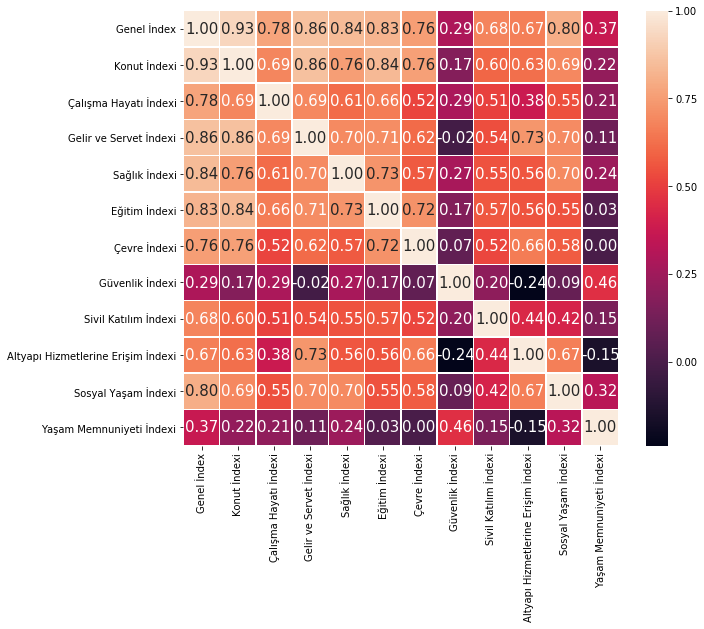

In [8]:
plt.figure(figsize=(10,8))
corr = df.drop(['İl','Genel Sıralama','Konut Sıralaması','Çalışma Hayatı Sıralaması','Gelir ve Servet Sıralaması','Sağlık Sıralaması','Eğitim Sıralaması','Çevre Sıralaması','Güvenlik Sıralaması','Sivil Katılım Sıralaması','Altyapı Hizmetlerine Erişim Sıralaması','Sosyal Yaşam Sıralaması','Yaşam Memnuniyeti Sıralaması'],axis=1).corr()
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = .5, fmt='.2f',annot_kws={'size': 15}) 
plt.show()

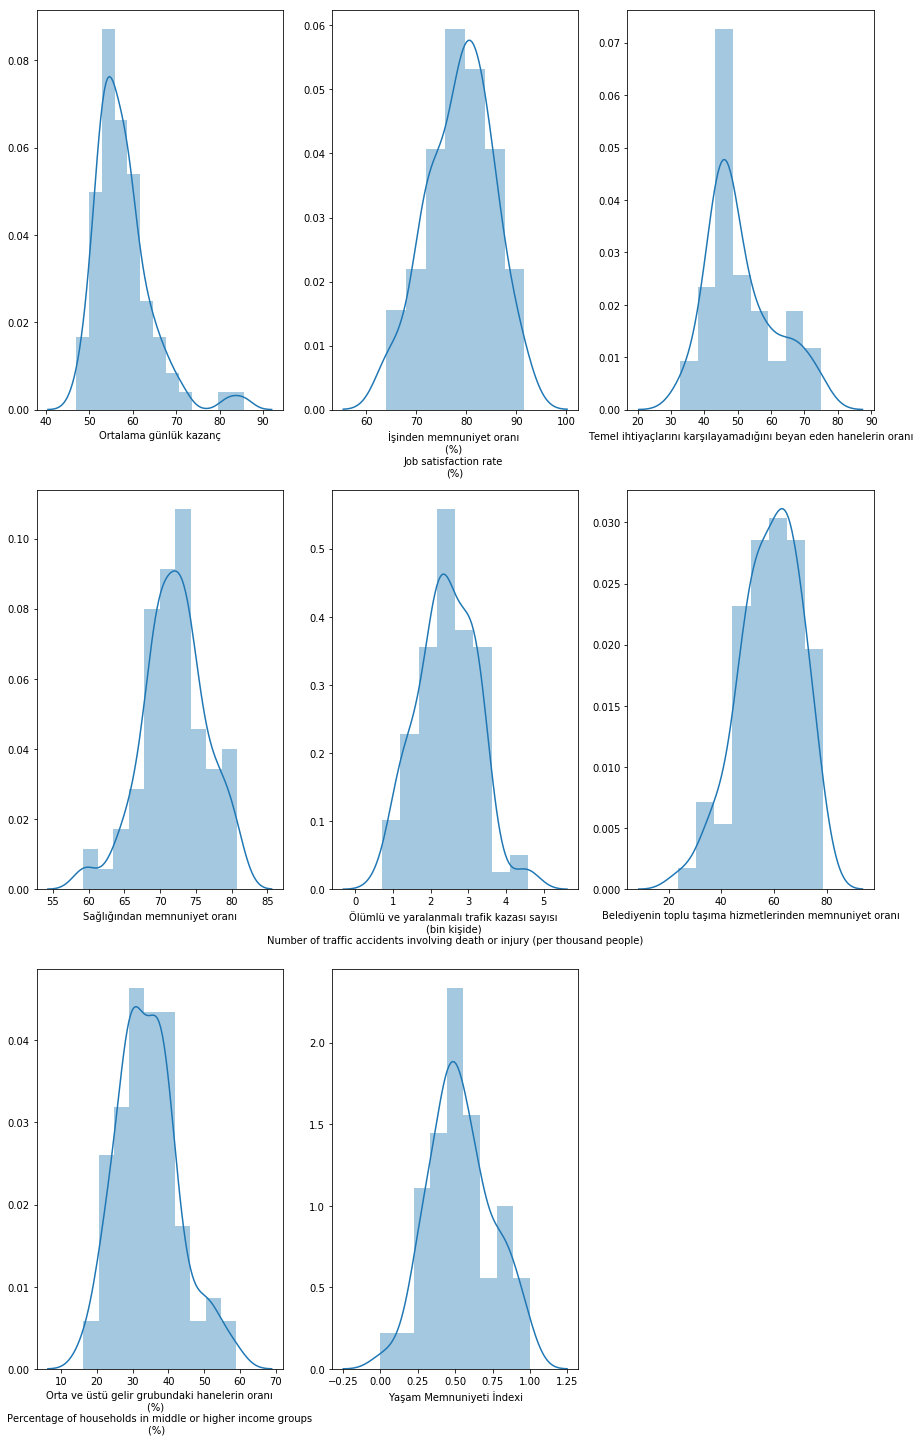

In [9]:
faktorler2 = ['Konut İndexi','Çalışma Hayatı İndexi','Gelir ve Servet İndexi','Sağlık İndexi','Eğitim İndexi','Güvenlik İndexi','Sosyal Yaşam İndexi','Yaşam Memnuniyeti İndexi']
faktorler = ['Ortalama günlük kazanç','İşinden memnuniyet oranı \n(%) \nJob satisfaction rate \n(%)','Temel ihtiyaçlarını karşılayamadığını beyan eden hanelerin oranı','Sağlığından memnuniyet oranı','Ölümlü ve yaralanmalı trafik kazası sayısı \n(bin kişide) \nNumber of traffic accidents involving death or injury (per thousand people)','Belediyenin toplu taşıma hizmetlerinden memnuniyet oranı','Orta ve üstü gelir grubundaki hanelerin oranı\n(%)   \nPercentage of households in middle or higher income groups\n(%)  ','Yaşam Memnuniyeti İndexi']
def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(15,25))
plot_columns_on_grid(union, faktorler, (3, 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232C7AB1EB8>,
      dtype=object)

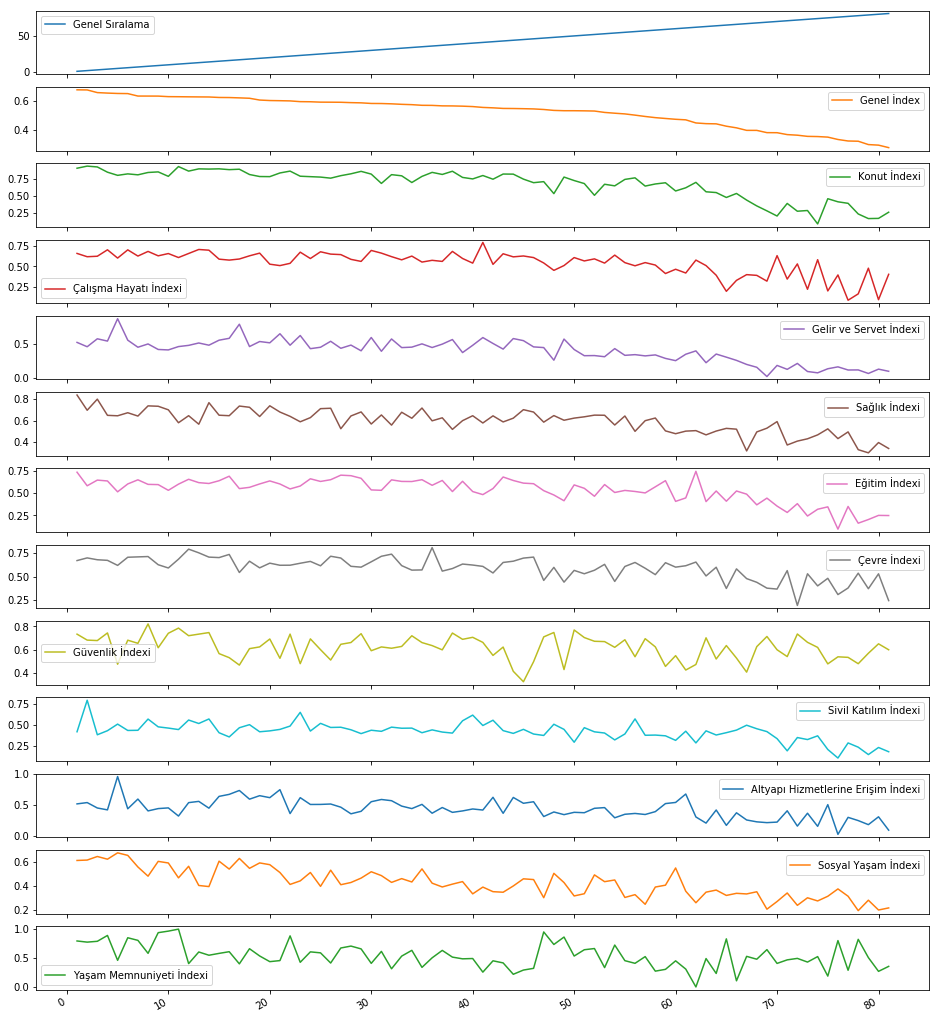

In [10]:
b = df.drop(['Konut Sıralaması','Çalışma Hayatı Sıralaması','Gelir ve Servet Sıralaması','Sağlık Sıralaması',
               'Eğitim Sıralaması','Çevre Sıralaması','Güvenlik Sıralaması','Sivil Katılım Sıralaması','Altyapı Hizmetlerine Erişim Sıralaması',
               'Sosyal Yaşam Sıralaması','Yaşam Memnuniyeti Sıralaması'], axis=1)
b.plot(subplots=True, figsize=(16, 20))

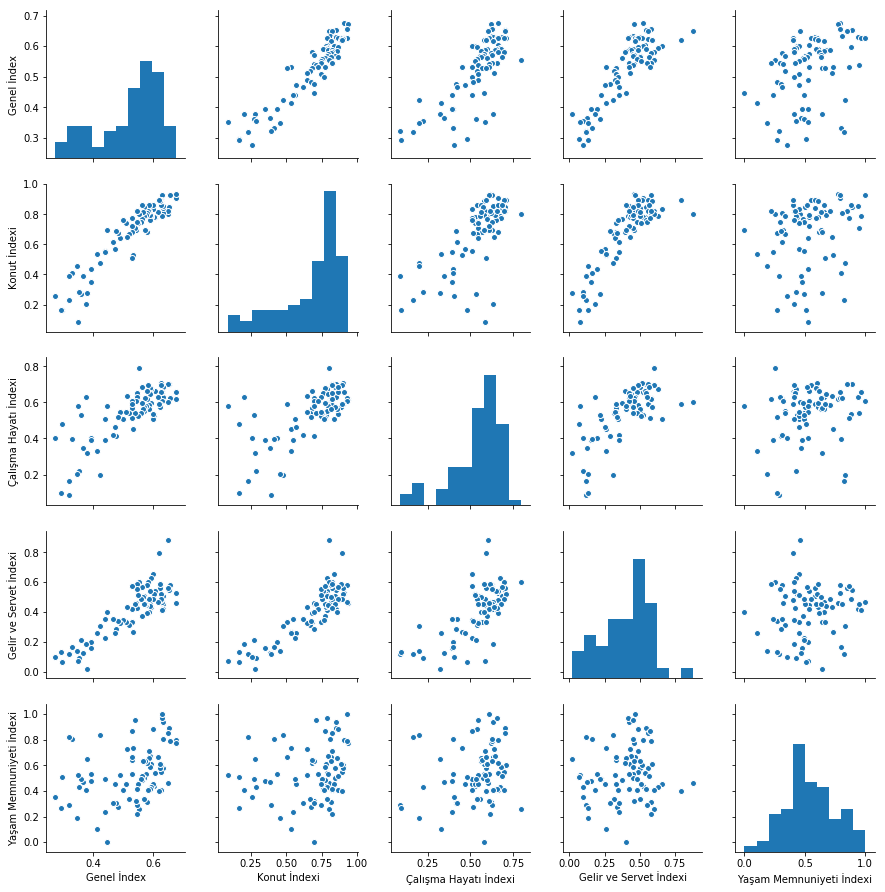

In [11]:
sns.pairplot(df[['Genel İndex','Konut İndexi', 'Çalışma Hayatı İndexi',
       'Gelir ve Servet İndexi', 'Yaşam Memnuniyeti İndexi']])

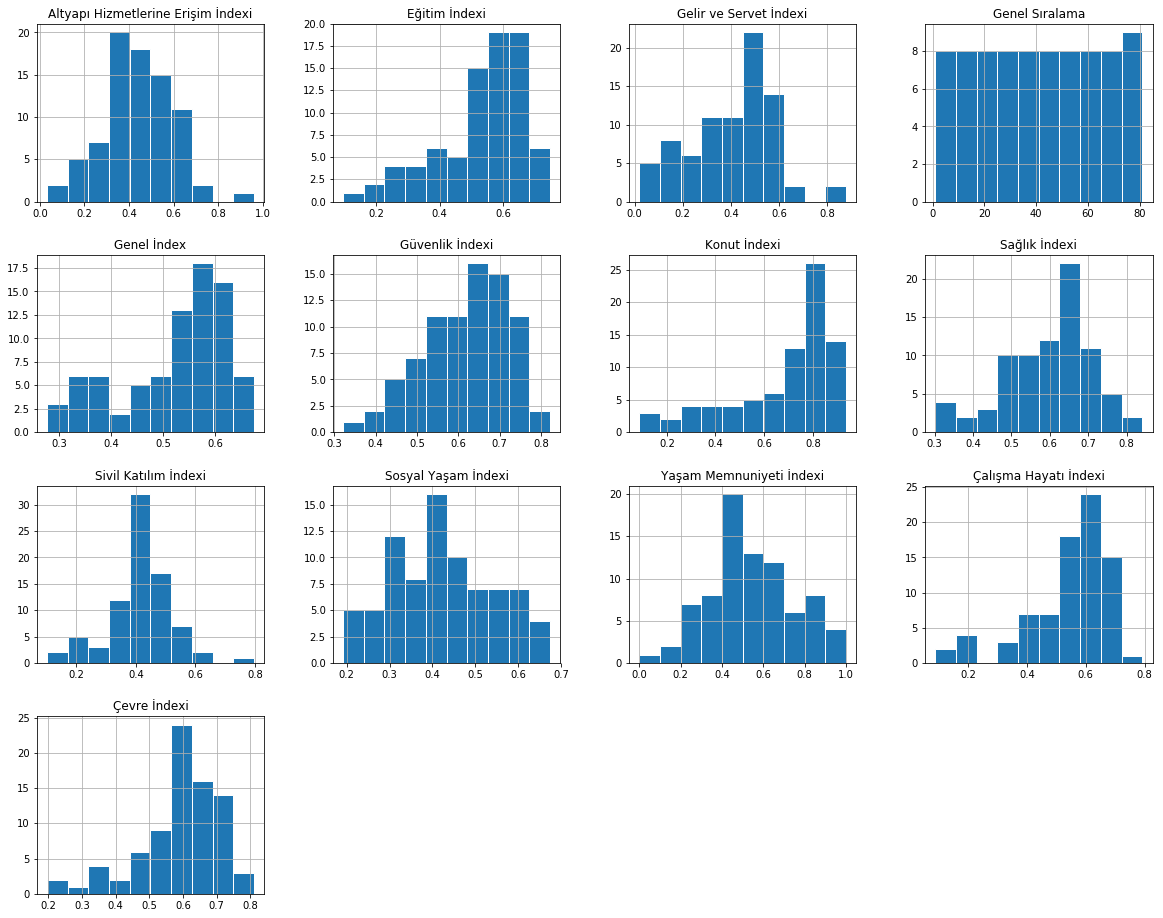

In [12]:
b.hist(edgecolor = 'white', linewidth = 1, figsize = (20,16))
plt.show()

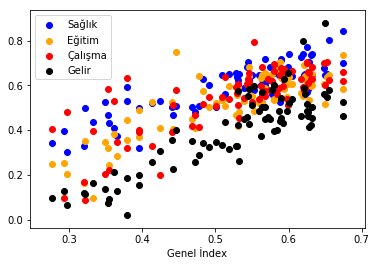

In [13]:
cols = [
    ("Sağlık İndexi", "blue"),
    ("Eğitim İndexi", "orange"),
    ("Çalışma Hayatı İndexi", "red"),
    ("Gelir ve Servet İndexi",'black')
]
for column, color in cols:
    label = column.split(" ")[0]
    plt.scatter(union["Genel İndex"], union[column], label=label, c=color)
plt.legend()
plt.xlabel("Genel İndex")
plt.show()

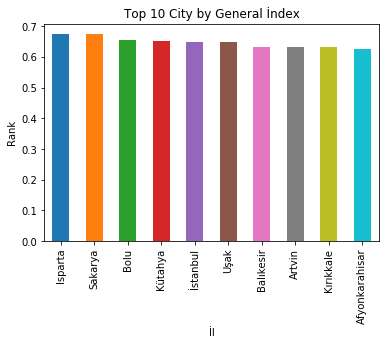

In [14]:
union2 = union.set_index('İl')
union2['Genel İndex'].sort_values(ascending=False).head(10).plot(kind="bar", title="Top 10 City by General İndex")
plt.ylabel("Rank")
plt.show()

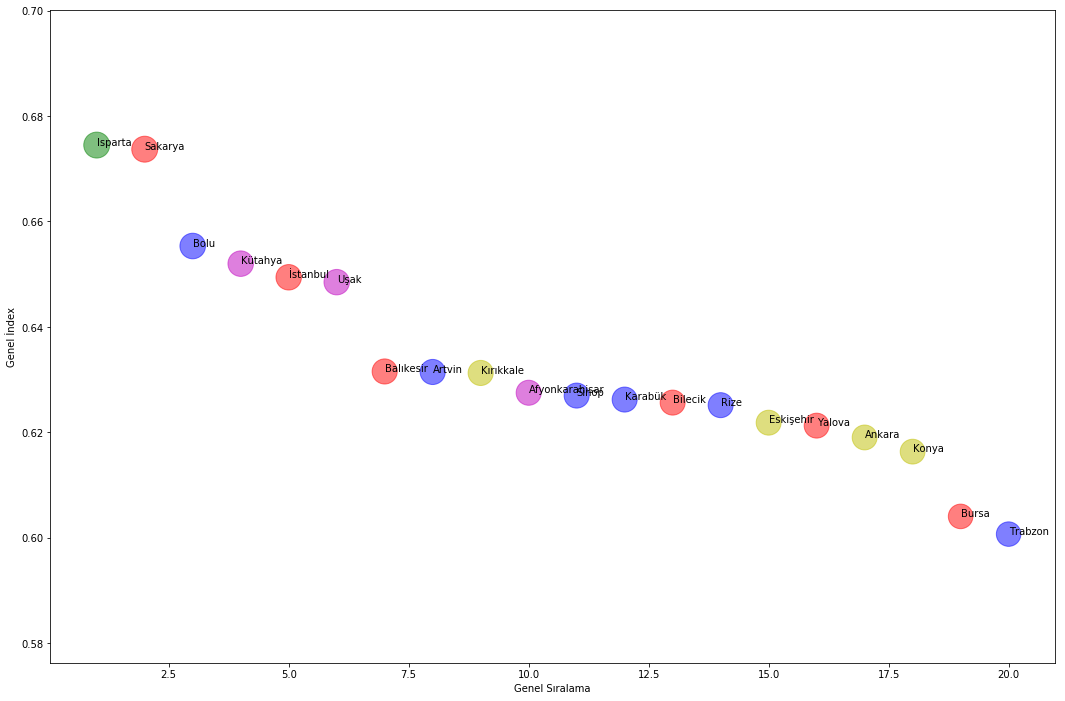

In [15]:
union2 = pd.DataFrame(union2).sort_values(ascending=False, by="Genel Sıralama").tail(20)


colors = union2.Bölge.map({'Marmara Bölgesi': 'r', 'Ege Bölgesi': 'm', 'Karadeniz Bölgesi': 'b', 'İç Anadolu Bölgesi': 'y', 'Akdeniz Bölgesi' : 'g', 'Güneydoğu Anadolu Bölgesi': 'c', 'Doğu Anadolu Bölgesi': 'k'})



bx = union2.plot(x="Genel Sıralama", y="Genel İndex", kind='scatter',alpha=0.5, c=colors,figsize=(18,12), s=union2['Genel İndex']*1000)
for i, txt in enumerate(union2.index):
    bx.annotate(txt, (union2['Genel Sıralama'].iat[i],union2['Genel İndex'].iat[i]))

In [16]:
ilKazancı = df.groupby(['Genel Sıralama','İl','Gelir ve Servet İndexi'])['Gelir ve Servet İndexi'].agg(['mean'],index = False).sort_values(by= 'mean',ascending = False)[:20]
ilKazancı.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])
ilKazancı.style.highlight_max(color = 'yellow')

,,,mean
Genel Sıralama,İl,Gelir ve Servet İndexi,
5.0,İstanbul,0.8788245313683869,0.878825
17.0,Ankara,0.7971940498676724,0.797194
21.0,İzmir,0.6553274238634849,0.655327
23.0,Kocaeli,0.6290578412223095,0.629058
30.0,Tekirdağ,0.5993469370456853,0.599347
41.0,Zonguldak,0.5986723555442333,0.598672
16.0,Yalova,0.587312248666245,0.587312
44.0,Antalya,0.5837876556761664,0.583788
3.0,Bolu,0.5802605556730089,0.580261


Text(0.5,0,'Genel Sıralama')

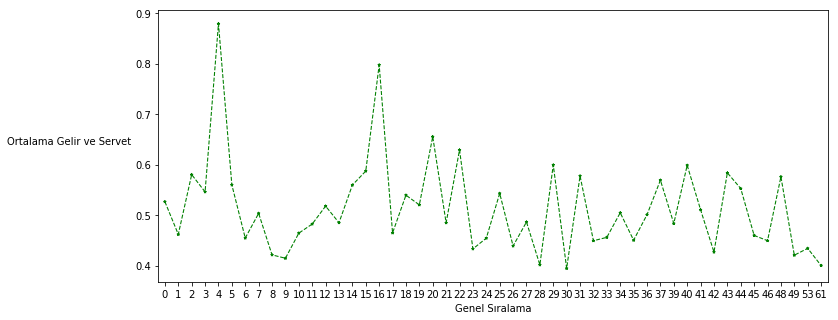

In [17]:
fig = plt.figure(figsize = (12,5))
cnt = df.groupby(['Genel Sıralama'],as_index=False).max()['Gelir ve Servet İndexi'].sort_values(ascending = False).to_frame()[:50]
sns.pointplot(y = 'Gelir ve Servet İndexi', x = cnt.index,data = cnt,markers=['*'],scale= 0.4,color='green',linestyles='--')
plt.ylabel("Ortalama Gelir ve Servet",rotation = 'horizontal',horizontalalignment = 'right')
plt.xlabel("Genel Sıralama")

In [18]:
ilGuvenlik = union.groupby(['Genel Sıralama','İl','Güvenlik İndexi'])['Güvenlik İndexi'].agg(['mean'],index = False).sort_values(by= 'mean',ascending = False)[:20]
ilGuvenlik.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])
ilGuvenlik.style.highlight_max(color = 'yellow')

,,,mean
Genel Sıralama,İl,Güvenlik İndexi,
8.0,Artvin,0.8221607441933982,0.822161
11.0,Sinop,0.7859966628047916,0.785997
50.0,Gümüşhane,0.7696784449359075,0.769678
48.0,Kahramanmaraş,0.748015195264104,0.748015
14.0,Rize,0.7471962861182831,0.747196
4.0,Kütahya,0.7439625112402843,0.743963
38.0,Bartın,0.7431455984003588,0.743146
10.0,Afyonkarahisar,0.7412011532311622,0.741201
29.0,Giresun,0.7375570224763919,0.737557


In [19]:
ilBebekölüm = union.groupby(['Genel Sıralama','İl','Bebek ölüm hızı \n(‰) \nInfant mortality rate \n(‰)'])['Bebek ölüm hızı \n(‰) \nInfant mortality rate \n(‰)'].agg(['mean'],index = False).sort_values(by= 'mean',ascending = False)[:20]
ilBebekölüm.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])
ilBebekölüm.style.highlight_max(color = 'yellow')

,,,mean
Genel Sıralama,İl,Bebek ölüm hızı (‰) Infant mortality rate (‰),
67.0,Kilis,25.727826675693976,25.7278
73.0,Şanlıurfa,17.88581337101021,17.8858
60.0,Gaziantep,17.72365070237411,17.7237
78.0,Şırnak,17.450478372187035,17.4505
71.0,Van,16.836348061019407,16.8363
80.0,Mardin,16.2194726354326,16.2195
76.0,Hakkari,16.059786929559547,16.0598
65.0,Siirt,15.67886133659513,15.6789
77.0,Batman,15.63345966432052,15.6335


In [20]:
ilİşsizlik = union.groupby(['Genel Sıralama','İl','İşsizlik oranı'])['İşsizlik oranı'].agg(['mean'],index = False).sort_values(by= 'mean',ascending = False)[:20]
ilİşsizlik.style.set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '')]}])
ilİşsizlik.style.highlight_max(color = 'yellow')

,,,mean
Genel Sıralama,İl,İşsizlik oranı,
77.0,Batman,23.4,23.4
80.0,Mardin,20.6,20.6
65.0,Siirt,20.5,20.5
78.0,Şırnak,20.1,20.1
75.0,Diyarbakır,18.7,18.7
73.0,Şanlıurfa,16.3,16.3
21.0,İzmir,15.4,15.4
66.0,Osmaniye,14.0,14
61.0,Adana,13.2,13.2


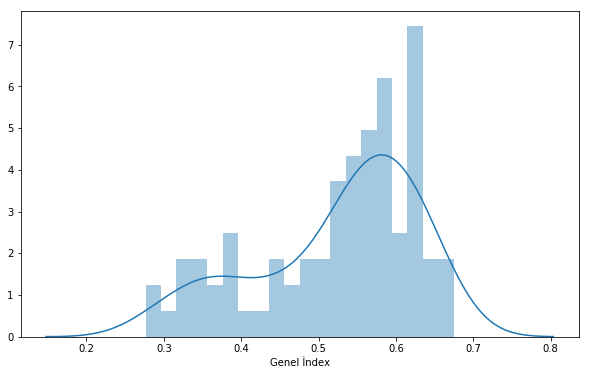

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['Genel İndex'],kde=True, bins = 20)
plt.show()

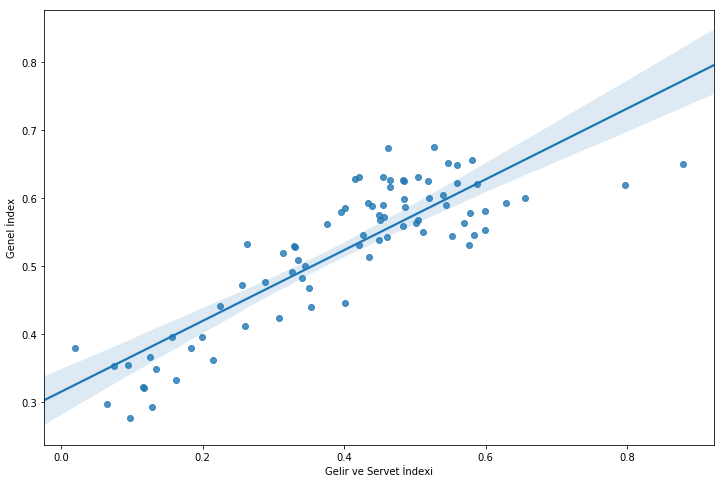

In [22]:
plt.figure(figsize=(12,8))
sns.regplot(x='Gelir ve Servet İndexi',y='Genel İndex' ,data=df)

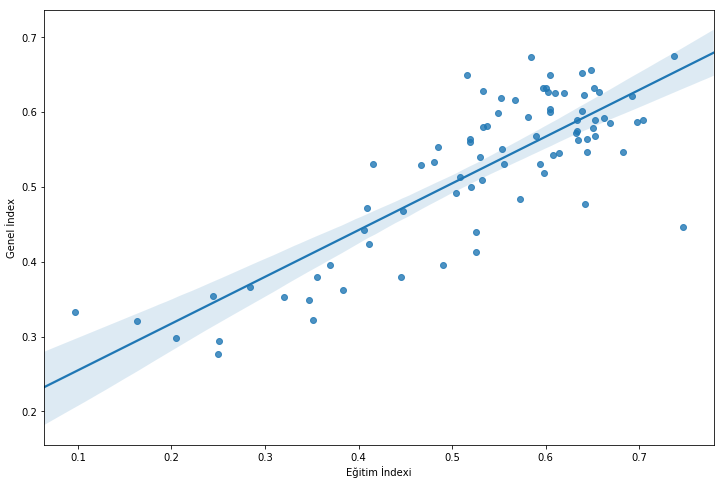

In [23]:
plt.figure(figsize=(12,8))
sns.regplot(x='Eğitim İndexi',y='Genel İndex' ,data=df)

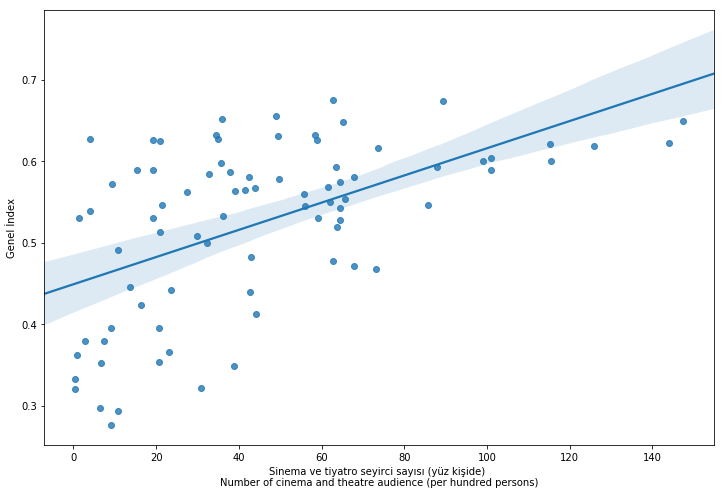

In [24]:
plt.figure(figsize=(12,8))
sns.regplot(x='Sinema ve tiyatro seyirci sayısı (yüz kişide) \nNumber of cinema and theatre audience (per hundred persons)',y='Genel İndex' ,data=union)

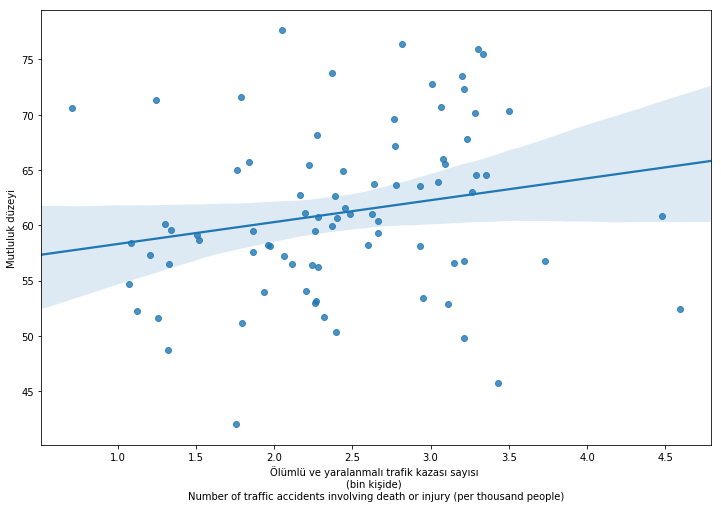

In [25]:
plt.figure(figsize=(12,8))
sns.regplot(x='Ölümlü ve yaralanmalı trafik kazası sayısı \n(bin kişide) \nNumber of traffic accidents involving death or injury (per thousand people)', y='Mutluluk düzeyi', data=union)


In [26]:
union.groupby('Bölge')['Genel Sıralama', 'Genel İndex', 'Gelir ve Servet İndexi'].mean().sort_values(by="Genel İndex", ascending=False)

,Genel Sıralama,Genel İndex,Gelir ve Servet İndexi
Bölge,,,
Marmara Bölgesi,18.727273,0.610688,0.562238
Ege Bölgesi,23.625000,0.598070,0.515838
Karadeniz Bölgesi,31.555556,0.576069,0.469201
İç Anadolu Bölgesi,31.923077,0.574652,0.481060
Akdeniz Bölgesi,48.250000,0.512174,0.381466
Doğu Anadolu Bölgesi,65.214286,0.410889,0.224644
Güneydoğu Anadolu Bölgesi,71.555556,0.367769,0.152336


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232C9A17860>],
      dtype=object)

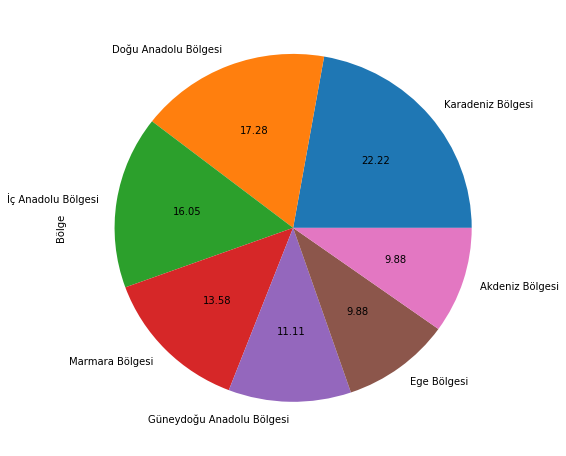

In [27]:
union['Bölge'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

Text(0,0.5,'Bölge')

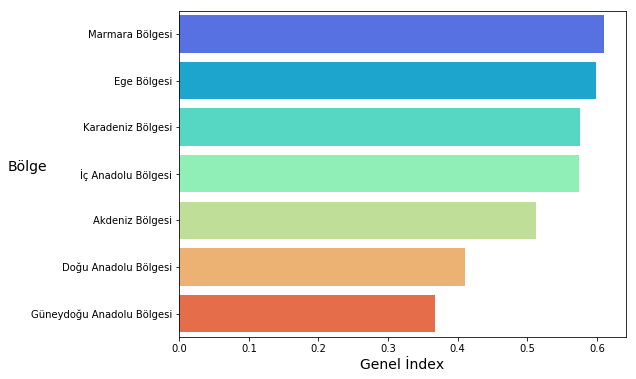

In [28]:
fig = plt.figure(figsize=(8,6))
bölge_famft = union.groupby(['Bölge']).mean()['Genel İndex'].sort_values(ascending = False).to_frame()[:15]
sns.barplot(x = bölge_famft['Genel İndex'],y = bölge_famft.index,data = bölge_famft,palette= 'rainbow')
plt.xlabel('Genel İndex',fontsize = 14)
plt.ylabel('Bölge',rotation = 'horizontal',fontsize = 14)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

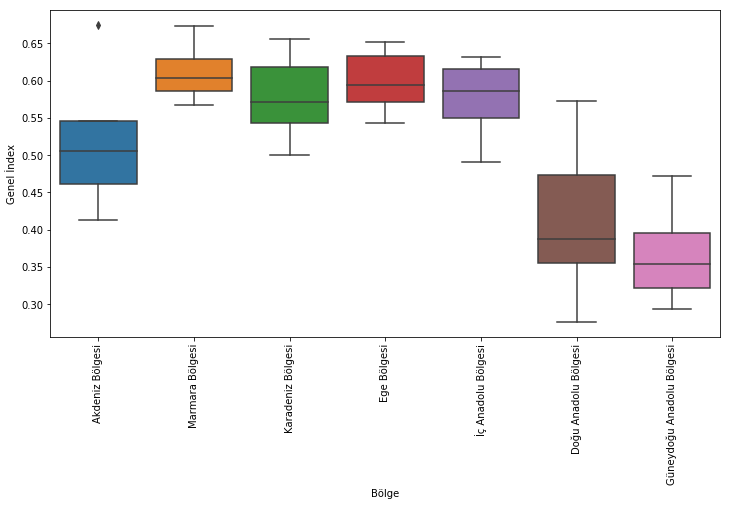

In [29]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Bölge', y='Genel İndex', data = union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

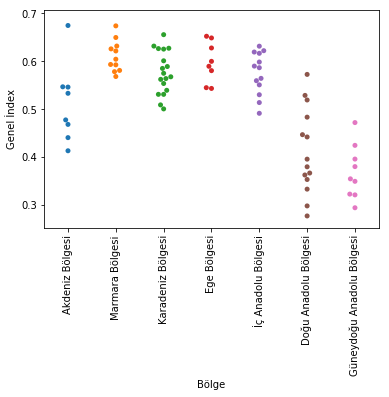

In [30]:
sns.swarmplot(x="Bölge", y="Genel İndex",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

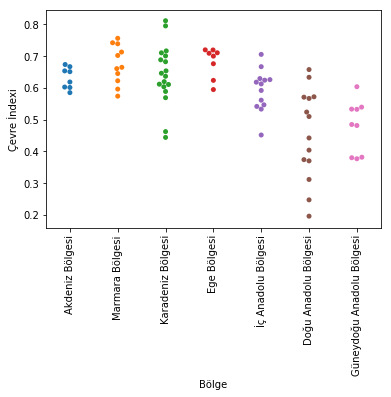

In [31]:
sns.swarmplot(x="Bölge", y="Çevre İndexi",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

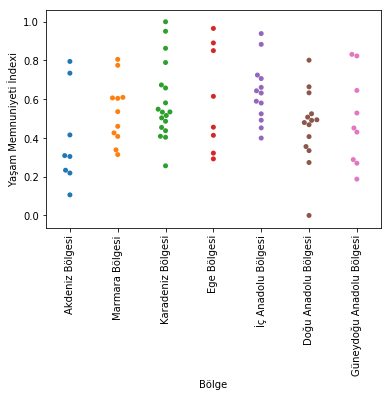

In [32]:
sns.swarmplot(x="Bölge", y="Yaşam Memnuniyeti İndexi",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

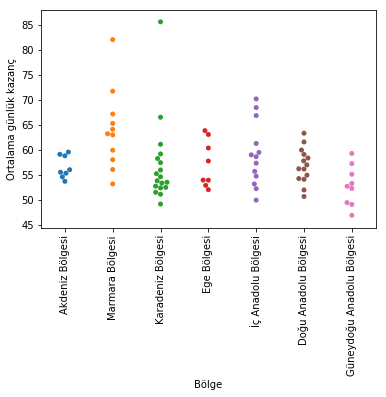

In [33]:
sns.swarmplot(x="Bölge", y="Ortalama günlük kazanç",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

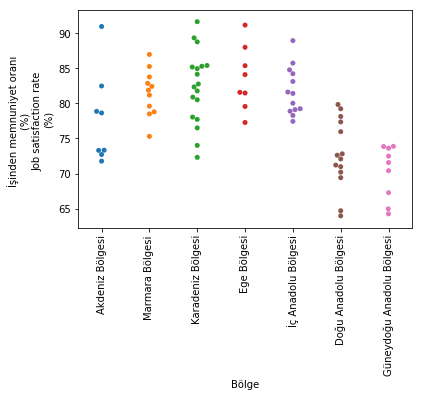

In [34]:
sns.swarmplot(x="Bölge", y="İşinden memnuniyet oranı \n(%) \nJob satisfaction rate \n(%)",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

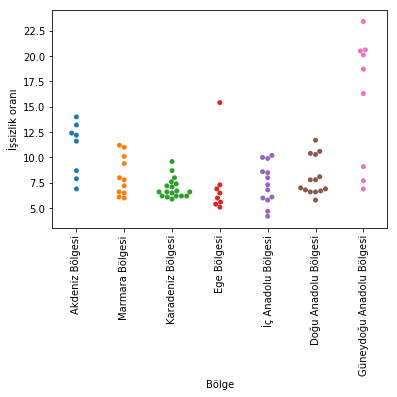

In [35]:
sns.swarmplot(x="Bölge", y="İşsizlik oranı",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

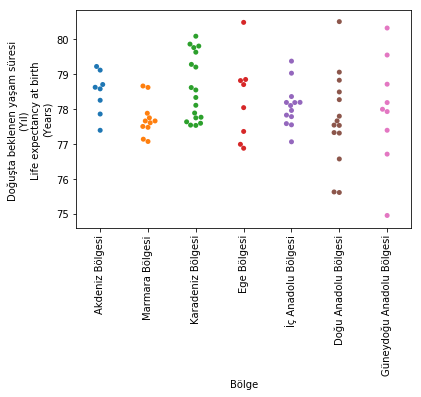

In [36]:
sns.swarmplot(x="Bölge", y="Doğuşta beklenen yaşam süresi \n(Yıl) \nLife expectancy at birth \n(Years)",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

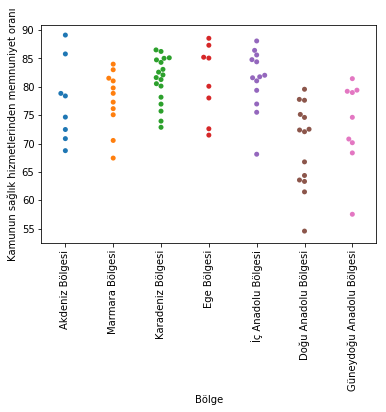

In [37]:
sns.swarmplot(x="Bölge", y="Kamunun sağlık hizmetlerinden memnuniyet oranı",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

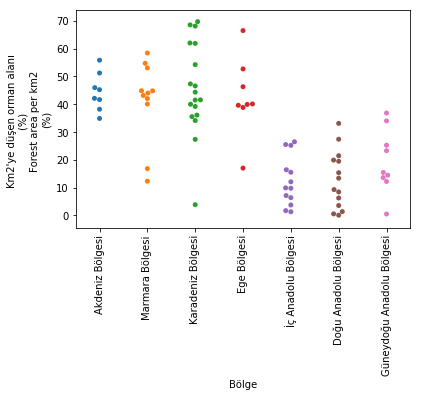

In [38]:
sns.swarmplot(x="Bölge", y="Km2'ye düşen orman alanı \n(%) \nForest area per km2 \n(%)",  data=union)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

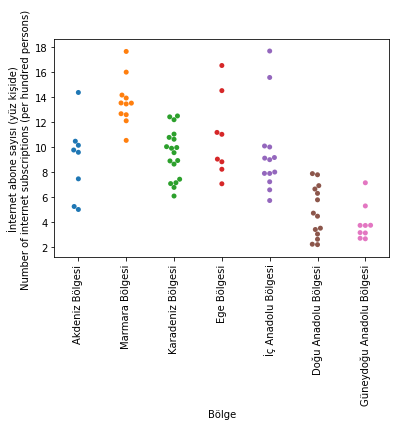

In [39]:
sns.swarmplot(x="Bölge", y="İnternet abone sayısı (yüz kişide)\nNumber of internet subscriptions (per hundred persons) ",  data=union)
plt.xticks(rotation=90)

In [40]:
egeBölgesi = union[union['Bölge'] == 'Ege Bölgesi']
marmaraBölgesi = union[union['Bölge'] == 'Marmara Bölgesi']
karadenizBölgesi = union[union['Bölge'] == 'Karadeniz Bölgesi']
akdenizbölgesi = union[union['Bölge'] == 'Akdeniz Bölgesi']
içanadoluBölgesi = union[union['Bölge'] == 'İç Anadolu Bölgesi']
güneydoğuanadoluBölgesi = union[union['Bölge'] == 'Güneydoğu Anadolu Bölgesi']
doğuanadoluBölgesi = union[union['Bölge'] == 'Doğu Anadolu Bölgesi']

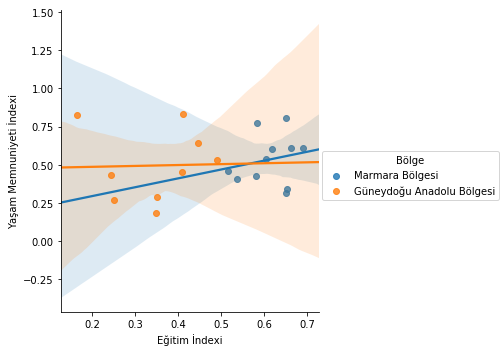

In [41]:
karşılaştırma = pd.concat([marmaraBölgesi,güneydoğuanadoluBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Eğitim İndexi',y='Yaşam Memnuniyeti İndexi',hue="Bölge")

plt.show()

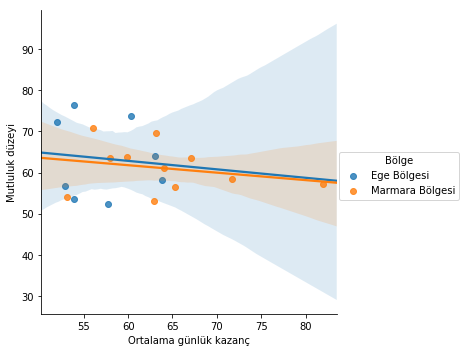

In [42]:
karşılaştırma = pd.concat([egeBölgesi,marmaraBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Ortalama günlük kazanç',y='Mutluluk düzeyi',hue="Bölge")

plt.show()

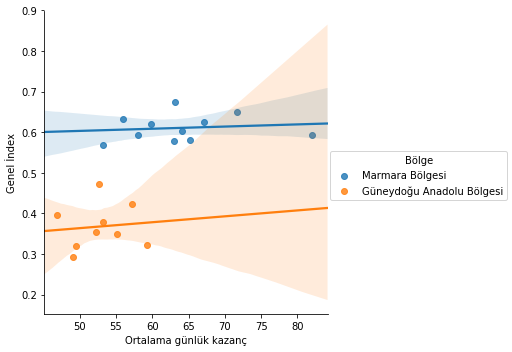

In [43]:
karşılaştırma = pd.concat([marmaraBölgesi,güneydoğuanadoluBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Ortalama günlük kazanç',y='Genel İndex',hue="Bölge")

plt.show()

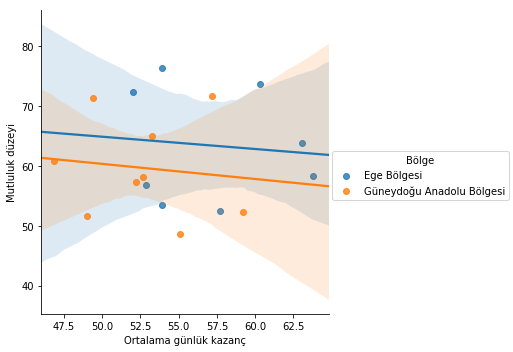

In [44]:
karşılaştırma = pd.concat([egeBölgesi,güneydoğuanadoluBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Ortalama günlük kazanç',y='Mutluluk düzeyi',hue="Bölge")

plt.show()

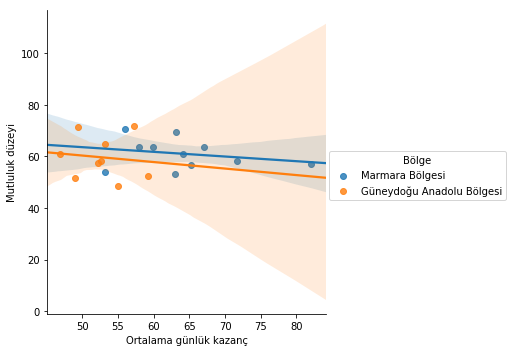

In [45]:
karşılaştırma = pd.concat([marmaraBölgesi,güneydoğuanadoluBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Ortalama günlük kazanç',y='Mutluluk düzeyi',hue="Bölge")

plt.show()

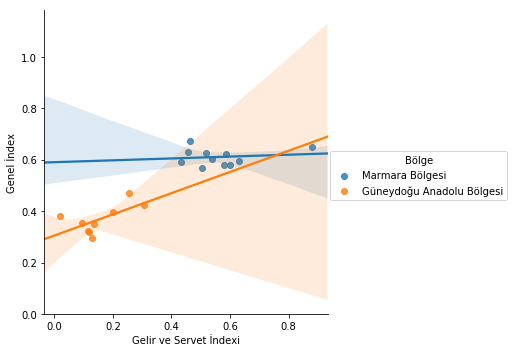

In [46]:
karşılaştırma = pd.concat([marmaraBölgesi,güneydoğuanadoluBölgesi],axis=0)
sns.lmplot(data=karşılaştırma,x='Gelir ve Servet İndexi',y='Genel İndex',hue="Bölge")

plt.show()

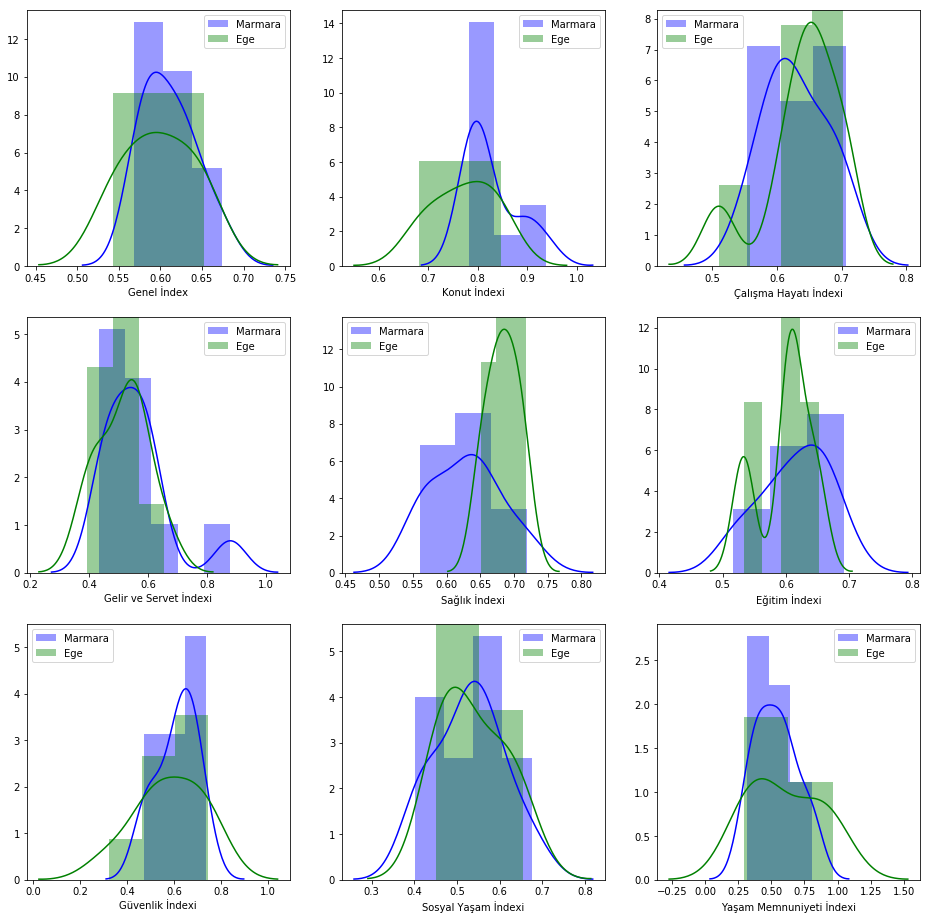

In [47]:
f, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = axes.flatten()
compareCols = ['Genel İndex','Konut İndexi','Çalışma Hayatı İndexi','Gelir ve Servet İndexi','Sağlık İndexi','Eğitim İndexi','Güvenlik İndexi','Sosyal Yaşam İndexi','Yaşam Memnuniyeti İndexi']
for i in range(len(compareCols)):
    col = compareCols[i]
    axi = axes[i]
    sns.distplot(marmaraBölgesi[col],color='blue' , label='Marmara', ax=axi)
    sns.distplot(egeBölgesi[col],color='green', label='Ege',ax=axi)
    axi.legend()

In [48]:
def plot_compare(dataset,bölgeler,compareCols):
    n = len(compareCols)
    f, axes = plt.subplots(math.ceil(n/2), 2, figsize=(16, 6*math.ceil(n/2)))
    axes = axes.flatten()
    #compareCols = ['Happiness Score','Economy','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)']
    for i in range(len(compareCols)):
        col = compareCols[i]
        axi = axes[i]
        for bölge in bölgeler:
            bu_bölge = dataset[dataset['Bölge']==bölge]
            sns.distplot(bu_bölge[col], label=bölge, ax=axi)
        axi.legend()

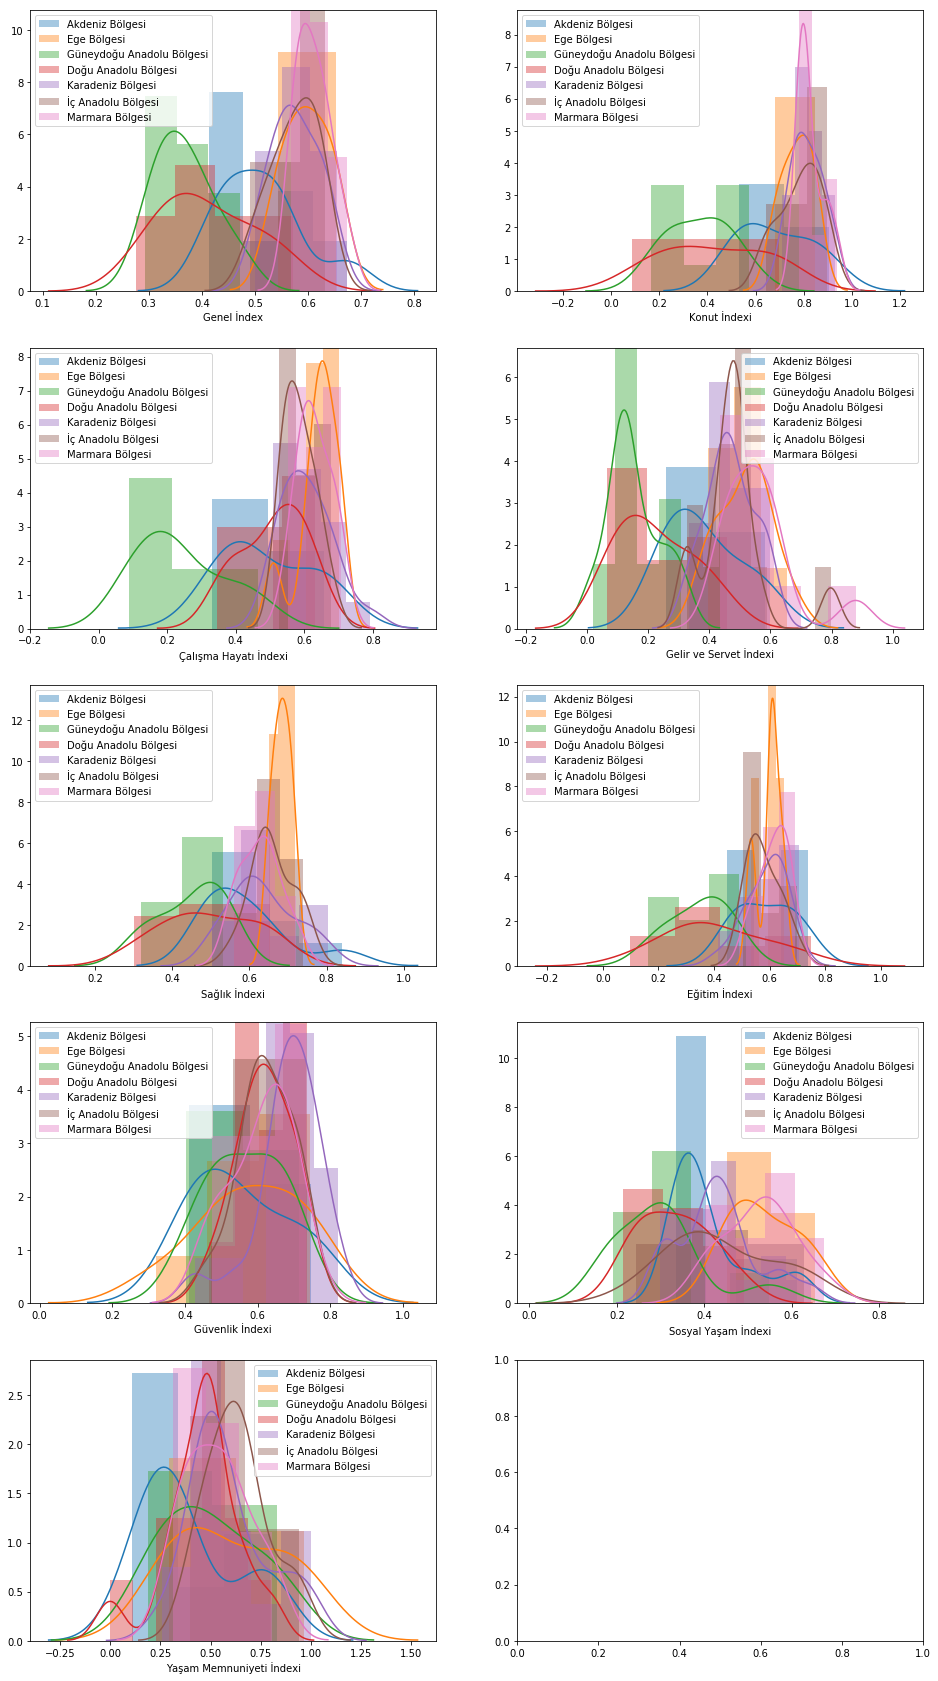

In [49]:
bölgeler = [
       'Akdeniz Bölgesi', 'Ege Bölgesi',
       'Güneydoğu Anadolu Bölgesi','Doğu Anadolu Bölgesi','Karadeniz Bölgesi','İç Anadolu Bölgesi',
        'Marmara Bölgesi']
selectCol = ['Genel İndex','Konut İndexi','Çalışma Hayatı İndexi','Gelir ve Servet İndexi','Sağlık İndexi','Eğitim İndexi','Güvenlik İndexi','Sosyal Yaşam İndexi','Yaşam Memnuniyeti İndexi']
plot_compare(union,bölgeler,selectCol)

In [50]:
union = pd.merge(df,df1, on='İl', how='inner')
union.set_index('İl', inplace=True)
del union['Bölge']
del df1['Bölge']

In [51]:
X = union.drop(['Genel İndex'], axis=1)
y = union['Genel İndex']


from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.1, random_state = 0)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 72 samples.
Testing set has 9 samples.


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [52]:
from sklearn.ensemble import GradientBoostingRegressor

exported_pipeline = GradientBoostingRegressor(alpha=0.85, learning_rate=0.1, loss="ls",
                                              max_features=0.9, min_samples_leaf=5,
                                              min_samples_split=6)
exported_pipeline.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.85, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=0.9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [53]:
results = exported_pipeline.predict(X_test)
results_ground = np.array(y_test)
error = results_ground - results

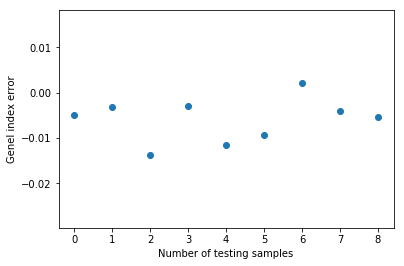

In [54]:
x_axis = range(0, len(error))
y_axis = error

_ = plt.scatter(x_axis,y_axis)
_ = plt.xlabel('Number of testing samples')
_ = plt.ylabel('Genel index error')

In [55]:
score = exported_pipeline.score(X_test, y_test)
print(score)

0.9939916587030563


In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [57]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head()

,Actual,Predict,Diff
İl,,,
Kocaeli,0.593057,0.593057,7.438494e-15
Kırşehir,0.586272,0.586272,1.776357e-15
Tunceli,0.446370,0.446370,-2.109424e-15
Rize,0.625164,0.625164,3.885781e-15
Iğdır,0.362114,0.362114,1.204592e-14


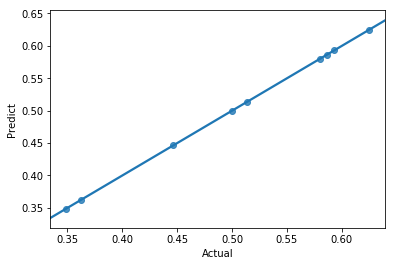

In [58]:
sns.regplot(x='Actual',y='Predict',data=result_lm)

In [59]:
lm.score(X_test, y_test)

1.0

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.463965165595356e-15
MSE: 8.935972554411106e-29
RMSE: 9.453027321663207e-15


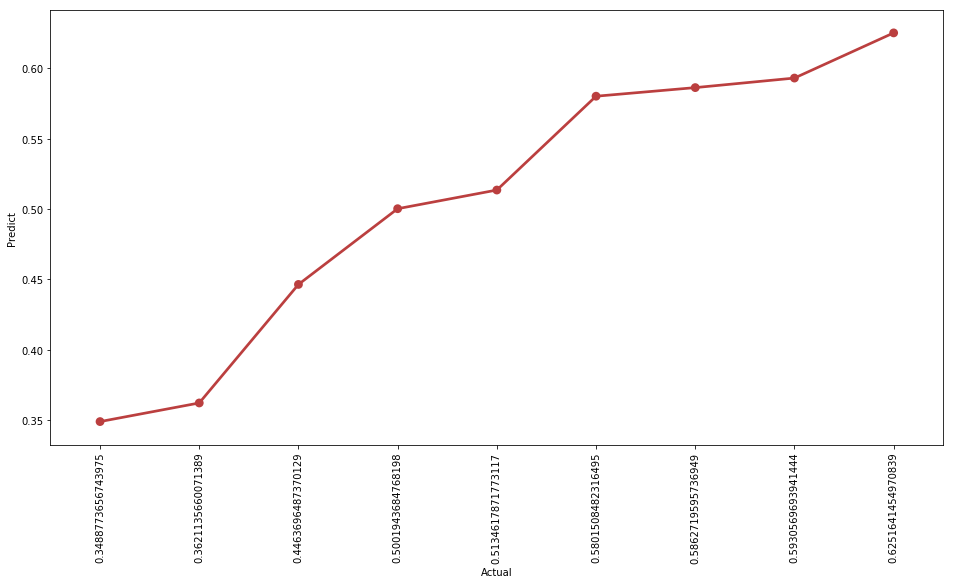

In [61]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data=result_lm, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [63]:
result_rf = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_rf['Diff'] = y_test - y_pred
result_rf.head()

,Actual,Predict,Diff
İl,,,
Kocaeli,0.593057,0.597000,-0.003944
Kırşehir,0.586272,0.588095,-0.001823
Tunceli,0.446370,0.462975,-0.016605
Rize,0.625164,0.627113,-0.001948
Iğdır,0.362114,0.372177,-0.010064


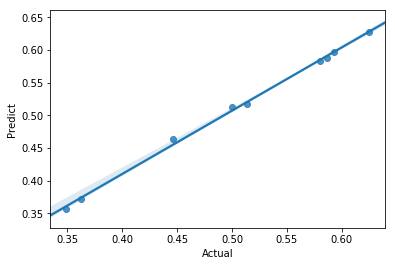

In [64]:
sns.regplot(x='Actual',y='Predict',data=result_rf)

In [65]:
rf.score(X_test, y_test)

0.9922373746502244

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0069062168873274665
MSE: 7.137874545429002e-05
RMSE: 0.00844859428865477


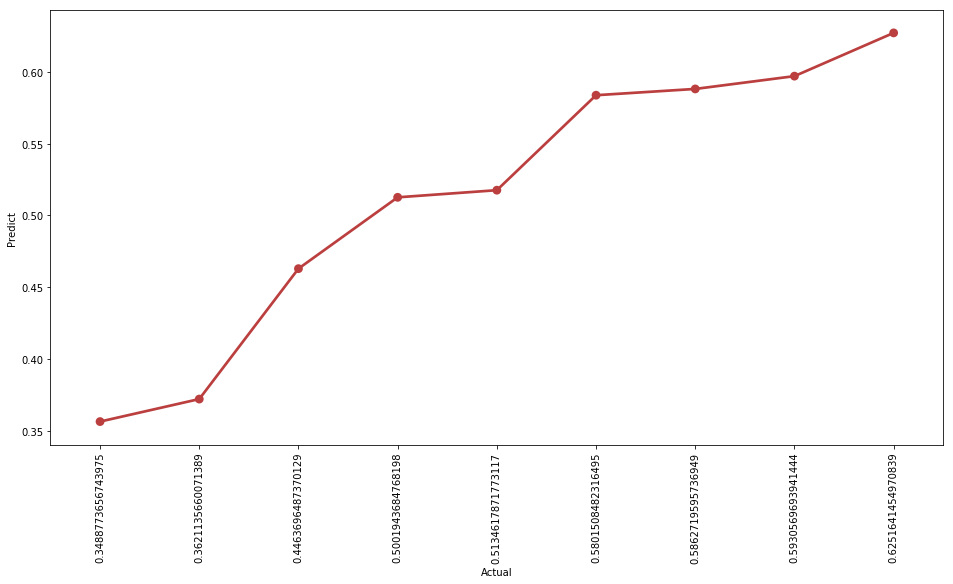

In [67]:
plt.figure (figsize = (16, 8))
sns.pointplot(x='Actual',y='Predict',data=result_rf, dodge = True, color="#bb3f3f")
plt.xticks(rotation = 90)
plt.show()

In [68]:
X = union.drop(['Genel İndex'], axis=1)
y = union['Genel İndex']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=42)

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
# regression coefficients
print('Coefficients: \n', lm.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(X_test, y_test)))
 

Coefficients: 
 [-1.56495259e-16  1.80614529e-16  1.03588489e-02  4.06575815e-17
  3.24399729e-05 -2.96637714e-16  1.12343585e-05 -1.57371945e-16
  1.37395203e-04  2.20851983e-16  2.91043860e-05 -8.82540568e-17
  7.98627782e-06  2.75658402e-16  3.83225414e-04 -6.83047369e-18
  8.90947117e-05  2.02745806e-16  2.66934211e-05 -7.32920669e-17
  1.95547118e-05  6.92805188e-17  7.13537193e-05  2.88710545e-02
  5.41223154e-04 -7.59657113e-04  7.25851845e-04 -1.18328973e-03
  5.87266575e-04  8.22264305e-04  1.72992370e-06  7.10583619e-04
 -7.18503332e-04 -8.87569441e-04  3.27145738e-03 -3.42266502e-06
  8.40089734e-04  5.24995348e-04  6.13568441e-04  1.48176629e-04
  6.19323271e-04  1.28983814e-03  4.46475001e-04 -1.91370747e-04
  2.60978502e-04  2.82766723e-04 -6.63753959e-04  3.17336724e-04
 -3.48869285e-04 -5.82115930e-03  5.37181732e-04  6.29001289e-04
  1.89208325e-03  1.35843719e-03  1.63286581e-03  1.46583910e-03
  3.29804229e-04  2.30085879e-06  4.10489600e-04  1.54412093e-04
  8.00068

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11823554739393237
MSE: 0.019295699079858557
RMSE: 0.13890895968172304


In [72]:
print("Estimated Intercept is", lm.intercept_)

Estimated Intercept is -0.9008856235289436


In [73]:
print("The number of coefficients in this model are", lm.coef_)

The number of coefficients in this model are [-1.56495259e-16  1.80614529e-16  1.03588489e-02  4.06575815e-17
  3.24399729e-05 -2.96637714e-16  1.12343585e-05 -1.57371945e-16
  1.37395203e-04  2.20851983e-16  2.91043860e-05 -8.82540568e-17
  7.98627782e-06  2.75658402e-16  3.83225414e-04 -6.83047369e-18
  8.90947117e-05  2.02745806e-16  2.66934211e-05 -7.32920669e-17
  1.95547118e-05  6.92805188e-17  7.13537193e-05  2.88710545e-02
  5.41223154e-04 -7.59657113e-04  7.25851845e-04 -1.18328973e-03
  5.87266575e-04  8.22264305e-04  1.72992370e-06  7.10583619e-04
 -7.18503332e-04 -8.87569441e-04  3.27145738e-03 -3.42266502e-06
  8.40089734e-04  5.24995348e-04  6.13568441e-04  1.48176629e-04
  6.19323271e-04  1.28983814e-03  4.46475001e-04 -1.91370747e-04
  2.60978502e-04  2.82766723e-04 -6.63753959e-04  3.17336724e-04
 -3.48869285e-04 -5.82115930e-03  5.37181732e-04  6.29001289e-04
  1.89208325e-03  1.35843719e-03  1.63286581e-03  1.46583910e-03
  3.29804229e-04  2.30085879e-06  4.10489600e

In [74]:
coef = zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
coef_df

,features,coefficients
0,Genel Sıralama,-1.564953e-16
1,Konut Sıralaması,1.806145e-16
2,Konut İndexi,1.035885e-02
3,Çalışma Hayatı Sıralaması,4.065758e-17
4,Çalışma Hayatı İndexi,3.243997e-05
5,Gelir ve Servet Sıralaması,-2.966377e-16
6,Gelir ve Servet İndexi,1.123436e-05
7,Sağlık Sıralaması,-1.573719e-16
8,Sağlık İndexi,1.373952e-04
9,Eğitim Sıralaması,2.208520e-16


In [75]:
lm.predict(X)[0:100]

array([0.67449519, 0.6737164 , 0.65534972, 0.65200419, 0.64941838,
       0.64849429, 0.63155452, 0.63145892, 0.63127201, 0.62751488,
       0.62698076, 0.62622351, 0.62564818, 0.62516415, 0.62183995,
       0.62127815, 0.61903656, 0.61634698, 0.60406383, 0.60070503,
       0.59957887, 0.59815993, 0.59305697, 0.59228718, 0.58964397,
       0.58927143, 0.58875839, 0.58627196, 0.5847929 , 0.58062018,
       0.58015085, 0.57801971, 0.57461955, 0.57229041, 0.56790374,
       0.56730421, 0.56402663, 0.5635973 , 0.56193245, 0.55915077,
       0.55328901, 0.55044312, 0.54638479, 0.54579631, 0.54457196,
       0.54297269, 0.53906086, 0.53280439, 0.53063033, 0.53058639,
       0.52980587, 0.52841565, 0.51883912, 0.51346179, 0.50859932,
       0.50019437, 0.49101054, 0.48297445, 0.47719848, 0.47163416,
       0.46782131, 0.44636965, 0.4415812 , 0.44018946, 0.4240247 ,
       0.41270347, 0.39537445, 0.39520427, 0.3796338 , 0.37924212,
       0.36619329, 0.36211357, 0.35403565, 0.35269058, 0.34887

In [76]:
trace = go.Scatter(
    x = lm.predict(X),
    y = df['Genel İndex'],
    mode = 'lines+markers'
)
data = [trace]
layout = go.Layout(
    title='Yaşam İndexi vs. Tahmin Edilen Yaşam İndexi',
    xaxis=dict(
        title='Yaşam İndexi',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Tahmin Edilen Yaşam İndexi',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [77]:
X = df1.drop(['İl'], axis=1)
y = df['Genel İndex']

from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
mse_scores = -scores
print(mse_scores)

[0.03361332 0.01352371 0.0141461  0.01996372 0.01106398 0.02061342
 0.01334401 0.03968307 0.0353612  0.09585125]


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_

In [78]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.18333936 0.11629149 0.11893736 0.14129304 0.10518544 0.14357375
 0.11551629 0.1992061  0.18804573 0.30959853]


In [79]:
print(rmse_scores.mean())

0.16209870898549164


In [80]:
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

0.16209870898549164


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_

In [81]:
feature_cols = ['Kamunun sağlık hizmetlerinden memnuniyet oranı','İşsizlik oranı','Sosyal hayatından memnuniyet oranı','Mutluluk düzeyi']
X = df1[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

0.10052982743079482


C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\Goal\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_